In [4]:
import io

import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from gmft.auto import AutoTableDetector, AutoTableFormatter  # type: ignore
from gmft.pdf_bindings import PyPDFium2Document  # type: ignore
from PIL import Image

In [1]:
import pdfplumber
import io
from PIL import Image
import matplotlib.pyplot as plt


def extract_images_with_pdfplumber(pdf_path, page_number, min_width=100, min_height=100):
    images_list = []

    with pdfplumber.open(pdf_path) as pdf:
        # Ensure the page number is within the valid range
        if page_number < 0 or page_number >= len(pdf.pages):
            raise ValueError("Page number out of range.")

        page = pdf.pages[page_number]

        # Get all images on the page
        images = page.images

        print(f"Found {len(images)} images on page {page_number + 1}.")

        for img in images:
            # Access image properties
            x0 = img["x0"]
            y0 = img["top"]
            x1 = img["x1"]
            y1 = img["bottom"]
            width = img["width"]
            height = img["height"]
            object_id = img["object_id"]
            name = img.get("name", "unknown")  # Some images might not have a name

            # Filter images based on dimensions
            if width >= min_width and height >= min_height:
                try:
                    # Extract the image bytes using the object ID
                    image_dict = page.extract_image(object_id)

                    if image_dict is None:
                        print(f"Warning: Unable to extract image with object ID {object_id}.")
                        continue

                    image_bytes = image_dict["image"]
                    image_ext = image_dict.get("ext", "png")  # Default to PNG if extension is missing

                    images_list.append(
                        {
                            "bytes": image_bytes,
                            "ext": image_ext,
                            "width": width,
                            "height": height,
                            "x0": x0,
                            "y0": y0,
                            "x1": x1,
                            "y1": y1,
                            "name": name,
                        }
                    )
                except Exception as e:
                    print(f"Error extracting image {object_id}: {e}")

    return images_list


def visualize_images(image_list):
    for i, img_info in enumerate(image_list):
        image_bytes = img_info["bytes"]
        image_ext = img_info["ext"]
        image_width = img_info["width"]
        image_height = img_info["height"]
        image_name = img_info.get("name", f"Image_{i+1}")

        try:
            # Open the image from bytes
            image = Image.open(io.BytesIO(image_bytes))

            # Plot the image
            plt.figure(figsize=(5, 5))
            plt.imshow(image)
            plt.axis("off")
            plt.title(f"{image_name}: {image_width}x{image_height}px ({image_ext.upper()})")
            plt.show()
        except Exception as e:
            print(f"Error displaying image {i+1}: {e}")


# Example usage
pdf_path = "doc.pdf"
page_number = 42  # Zero-based index (page 32 in 1-based indexing)

# Extract images
try:
    extracted_images = extract_images_with_pdfplumber(pdf_path, page_number, min_width=100, min_height=100)
    print(f"Extracted {len(extracted_images)} images after filtering.")
except Exception as e:
    print(f"Failed to extract images: {e}")

# Visualize images
if extracted_images:
    visualize_images(extracted_images)
else:
    print("No images to display.")

Found 2 images on page 43.
Failed to extract images: 'object_id'


NameError: name 'extracted_images' is not defined

In [ ]:
len(extracted_images)

In [ ]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current Working Directory:", cwd)

71


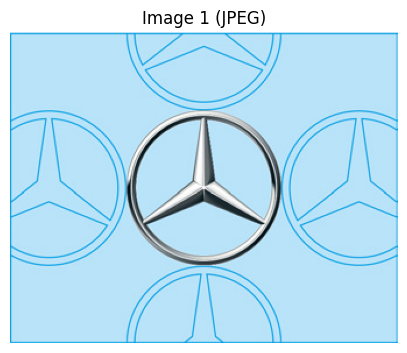

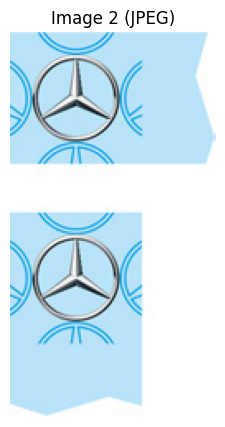

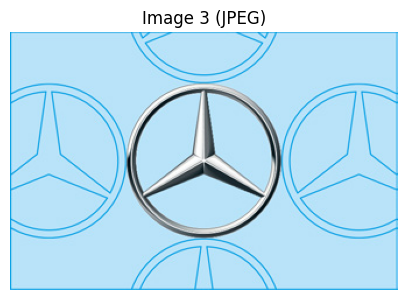

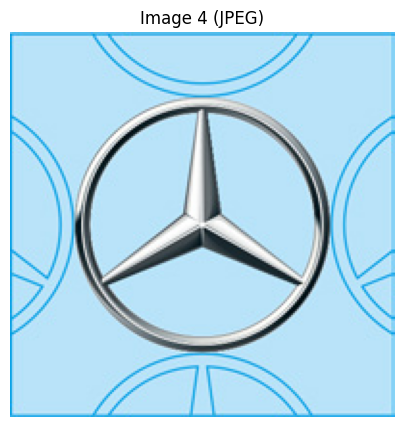

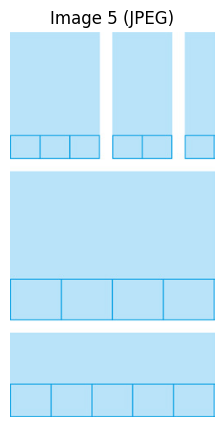

In [3]:
import fitz


def extract_images_from_page(pdf_path: str, page_number: int):
    # Open the PDF document
    doc = fitz.open(pdf_path)
    print(doc.page_count)

    # Get the specific page (note: page numbering starts from 0)
    page = doc.load_page(page_number)

    # Extract all images from the page
    images = page.get_images(full=True)

    image_list = []

    # Loop over the images
    for img_index, img_info in enumerate(images):
        xref = img_info[0]  # the XREF of the image
        base_image = doc.extract_image(xref)  # extract the image bytes
        image_bytes = base_image["image"]  # image binary data
        image_ext = base_image["ext"]  # image extension (e.g., png, jpeg)

        # Append the image info to the list
        image_list.append({"bytes": image_bytes, "ext": image_ext})

    return image_list


def visualize_images(image_list):
    # Loop through extracted images and visualize them
    for i, img_info in enumerate(image_list):
        image_bytes = img_info["bytes"]
        image_ext = img_info["ext"]

        # Open the image from bytes using PIL and convert to an image object
        image = Image.open(io.BytesIO(image_bytes))

        # Plot the image using matplotlib
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.axis("off")  # Hide axis
        plt.title(f"Image {i+1} ({image_ext.upper()})")
        plt.show()


# Example usage
pdf_path = "doc.pdf"
page_number = 32

# Extract images from the page
extracted_images = extract_images_from_page(pdf_path, page_number)

# Visualize the extracted images
visualize_images(extracted_images)